RWA Hamiltonian:
================

\begin{align*}
H^{RWA} &= H_0 -\frac{2J_0(\eta)}{N} V\\
H_0 &\approx \bigg\{1-J_0(\eta)\bigg\}\left(\frac{N}{2}+1\right) + \frac{2}{N}\left(S^x\right)^2\sim  \frac{2}{N} \left(S^x\right)^2\\
V &= \bigg\{2\left(S^z\right)^2 + \left(S^x\right)^2\bigg\}
\end{align*}
where $\eta = \frac{4h}{\omega}$, and the quantization direction is $x$, *not* z. If eigenstates of $S^x$ are $\vert s \rangle$, where $s\in\left[-N/2, N/2\right]$, then, the perturbed eigenstates of $H^{RWA}$ are
\begin{align*}
|\phi_s\rangle &= \vert s \rangle -\frac{2J_0(\eta)}{N}\sum_{s^\prime\neq s}\frac{V_{ss^\prime}}{s-s^\prime}\vert s^\prime\rangle\\
V_{ss^\prime} &= \bigg\{2\left\langle s\left\vert\left(S^z\right)^2\right\vert s^\prime\right\rangle + \left\langle s\left\vert\left(S^x\right)^2\right\vert s^\prime\right\rangle\bigg\}
\end{align*}

We change the index from $s$ to $n = s + N/2$, which is an integer in the range $[0,N]$. Then
\begin{align*}
|\phi_n\rangle &= \vert n \rangle -\frac{2J_0(\eta)}{N}\sum_{m\neq n}\frac{V_{nm}}{n-m}\vert m\rangle\\
V_{nm} &= \bigg\{2\left\langle n\left\vert\left(S^z\right)^2\right\vert m\right\rangle + \left\langle n\left\vert\left(S^x\right)^2\right\vert m\right\rangle\bigg\}
\end{align*}

In [9]:
import sympy
from sympy.physics.quantum.spin import JzKet as n_ket
from sympy.physics.quantum.spin import JzBra as n_bra


from sympy.physics.quantum.spin import Jz as Sx
from sympy.physics.quantum.spin import Jx as Sy
from sympy.physics.quantum.spin import Jy as Sz


from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.innerproduct import InnerProduct as ip

from sympy.physics.quantum.spin import J2 as S2

N = sympy.Symbol('N', integer=True)
n = sympy.Symbol('n', integer=True)
m = sympy.Symbol('m', integer=True)



qapply((1/(n-m)) * (2 * n_bra(N,n) * Sz * Sz * n_ket(N,m) + n_bra(N,n) * Sx * Sx * n_ket(N,m))) * n_ket(N,m)

(hbar**2*N**2*KroneckerDelta(m, n)/(-m + n) + hbar**2*N*KroneckerDelta(m, n)/(-m + n) - hbar**2*sqrt(N**2 + N - m**2 - m)*sqrt(N**2 + N - m**2 - 3*m - 2)*KroneckerDelta(n, m + 2)/(-2*m + 2*n) - hbar**2*sqrt(N**2 + N - m**2 + m)*sqrt(N**2 + N - m**2 + 3*m - 2)*KroneckerDelta(n, m - 2)/(-2*m + 2*n))*|N,m>

The Inverse Participation Ratio is defined as
\begin{equation}
\psi = \sum_p \frac{1}{\left\vert \langle p \vert \phi_p \rangle \right\vert^4}
\end{equation}

In [1]:
import sympy

from sympy import KroneckerDelta as kdel

from sympy import zoo

from sympy.physics.quantum.spin import JzKet as n_ket
from sympy.physics.quantum.spin import JzBra as n_bra
from sympy.physics.quantum.dagger import Dagger

from sympy.physics.quantum.spin import Jz as Sx
from sympy.physics.quantum.spin import Jx as Sy
from sympy.physics.quantum.spin import Jy as Sz


from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.innerproduct import InnerProduct as ip

from sympy.physics.quantum.spin import J2 as S2

N = sympy.Symbol('N', integer=True, positive=True)
n = sympy.Dummy('n', integer=True, nonnegative=True)
m = sympy.Dummy('m', integer=True, nonnegative=True)

p = sympy.Dummy('p', integer=True, nonnegative=True)

lamb = sympy.Symbol('\lambda', real=True)


def psiprod(m,n):
    return qapply(lamb * qapply((1/(n-m)) * (2 * n_bra(N,n)\
                                                  * Sz * Sz * n_ket(N,m) + n_bra(N,n) *\
                                                            Sx * Sx * n_ket(N,m))) * n_ket(N,m))

phi_n = n_ket(N,n) -  sympy.Sum(psiprod(m,n),(m,0,N)).doit() 


sympy.simplify(phi_n).subs(zoo,0)
#inner_prod = phi_n.subs(n_ket(N,n),kdel(p,n))
#inner_prod = inner_prod.subs(n_ket(N,n-2),kdel(p,n-2))
#inner_prod = inner_prod.subs(n_ket(N,n+2),kdel(p,n+2))
#inner_prod = inner_prod.subs(n<=N, True)

#inner_prod
#p_psi_n = qapply(n_bra(N,p) * psi_n)
#psi_n_p = qapply(Dagger(psi_n) * n_ket(N,p))

#ipr= 1/(qapply(p_psi_n * psi_n_p))**2
#ipr

Piecewise(((-\lambda*(hbar**2*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2> - hbar**2*sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2>) + 4*|N,_n>)/4, (_n >= 2) & (_n <= N) & (_n - N <= -2) & (_n - N <= 2)), ((-hbar**2*\lambda*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2> + 4*|N,_n>)/4, (_n <= N) & (_n - N <= -2)), ((hbar**2*\lambda*sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2> + 4*|N,_n>)/4, (_n >= 2) & (_n <= N) & (_n - N <= 2)), (|N,_n>, _n <= N), ((-hbar**2*\lambda*(sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2> - sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2>) + 4*|N,_n>)/4, (_n >= 2) & (_n - N <= -2) & (_n - N <= 2)), (-hbar**2*\lambda*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2>/4 + |N,_n>, _n - N <= -2), (hbar**2*\lambda*sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2

In [2]:
from sympy.physics.quantum.constants import hbar


first = (- lamb * hbar**2 * (sympy.sqrt(-n**2 - n +N**2 + N) \
                            * sympy.sqrt(-n**2 - 3*n+ N**2 + N - 2))/4 )**4

second = (- lamb * hbar**2 * (sympy.sqrt(-n**2 + n + N**2 + N) \
                            * sympy.sqrt(-n**2 + 3*n+ N**2 + N - 2))/4 )**4

third = 1

ipr = 1/ (first + second + third)
ipr

1/(hbar**8*\lambda**4*(-_n**2 - _n + N**2 + N)**2*(-_n**2 - 3*_n + N**2 + N - 2)**2/256 + hbar**8*\lambda**4*(-_n**2 + _n + N**2 + N)**2*(-_n**2 + 3*_n + N**2 + N - 2)**2/256 + 1)

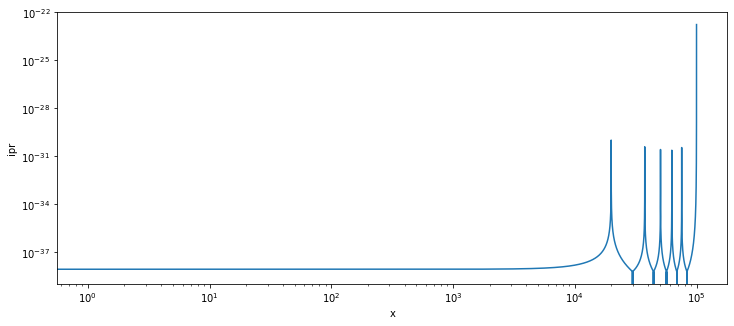

In [42]:
lamb = 1.0
hb = 1.0

N = 100000
n = np.arange(100000)

fterm = hb**8 * lamb **4 * (-n**2 -n + N**2 + N)**2 * (-n**2 - 3*n + N**2 + N -2)**2
sterm = hb**8 * lamb **4 * (-n**2 +n + N**2 + N)**2 * (-n**2 + 3*n + N**2 + N -2)**2
thrdterm = 1

ipr = 1/(fterm + sterm + thrdterm)

plt.figure(figsize=(12,5))

plt.plot(n, ipr)
plt.xlabel("x")
plt.ylabel("ipr")
plt.yscale("log")
plt.xscale("log")
plt.show()

## Introduce $J_0$ and KacNorm in perturbation term 


## RWA Hamiltonian:
================

\begin{align*}
H^{RWA} &= H_0 -\frac{2J_0(\eta)}{N} V\\
H_0 &\approx \bigg\{1-J_0(\eta)\bigg\}\left(\frac{N}{2}+1\right) + \frac{2}{N}\left(S^x\right)^2\sim  \frac{2}{N} \left(S^x\right)^2\\
V &= \bigg\{2\left(S^z\right)^2 + \left(S^x\right)^2\bigg\}
\end{align*}
where $\eta = \frac{4h}{\omega}$, and the quantization direction is $x$, *not* z. If eigenstates of $S^x$ are $\vert s \rangle$, where $s\in\left[-N/2, N/2\right]$, then, the perturbed eigenstates of $H^{RWA}$ are
\begin{align*}
|\phi_s\rangle &= \vert s \rangle -\frac{2J_0(\eta)}{N}\sum_{s^\prime\neq s}\frac{V_{ss^\prime}}{s-s^\prime}\vert s^\prime\rangle\\
V_{ss^\prime} &= \bigg\{2\left\langle s\left\vert\left(S^z\right)^2\right\vert s^\prime\right\rangle + \left\langle s\left\vert\left(S^x\right)^2\right\vert s^\prime\right\rangle\bigg\}
\end{align*}

We change the index from $s$ to $n = s + N/2$, which is an integer in the range $[0,N]$. Then
\begin{align*}
|\phi_n\rangle &= \vert n \rangle -\frac{2J_0(\eta)}{N}\sum_{m\neq n}\frac{V_{nm}}{n-m}\vert m\rangle\\
V_{nm} &= \bigg\{2\left\langle n\left\vert\left(S^z\right)^2\right\vert m\right\rangle + \left\langle n\left\vert\left(S^x\right)^2\right\vert m\right\rangle\bigg\}
\end{align*}

In [9]:
import sympy

from sympy import KroneckerDelta as kdel

from sympy import zoo

from sympy.physics.quantum.spin import JzKet as n_ket
from sympy.physics.quantum.spin import JzBra as n_bra
from sympy.physics.quantum.dagger import Dagger

from sympy.physics.quantum.spin import Jz as Sx
from sympy.physics.quantum.spin import Jx as Sy
from sympy.physics.quantum.spin import Jy as Sz


from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.innerproduct import InnerProduct as ip

from sympy.physics.quantum.spin import J2 as S2

N = sympy.Symbol('N', integer=True, positive=True)
n = sympy.Dummy('n', integer=True, nonnegative=True)
m = sympy.Dummy('m', integer=True, nonnegative=True)

p = sympy.Dummy('p', integer=True, nonnegative=True)

lamb = sympy.Symbol('\lambda', real=True)
j0 = sympy.Symbol('J_{0}(\eta)', real=True)


def psiprod(m,n):
    return qapply(lamb * qapply((1/(n-m)) * (2 * n_bra(N,n)\
                                                  * Sz * Sz * n_ket(N,m) + n_bra(N,n) *\
                                                            Sx * Sx * n_ket(N,m))) * n_ket(N,m))

phi_n = n_ket(N,n) -  (2 * j0/N)*sympy.Sum(psiprod(m,n),(m,0,N)).doit() 


sympy.simplify(phi_n).subs(zoo,0)
#inner_prod = phi_n.subs(n_ket(N,n),kdel(p,n))
#inner_prod = inner_prod.subs(n_ket(N,n-2),kdel(p,n-2))
#inner_prod = inner_prod.subs(n_ket(N,n+2),kdel(p,n+2))
#inner_prod = inner_prod.subs(n<=N, True)

#inner_prod
#p_psi_n = qapply(n_bra(N,p) * psi_n)
#psi_n_p = qapply(Dagger(psi_n) * n_ket(N,p))

#ipr= 1/(qapply(p_psi_n * psi_n_p))**2
#ipr

Piecewise((-(J_{0}(\eta)*\lambda*(hbar**2*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2> - hbar**2*sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2>) - 2*N*|N,_n>)/(2*N), (_n >= 2) & (_n <= N) & (_n - N <= -2)), (-hbar**2*J_{0}(\eta)*\lambda*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2>/(2*N) + |N,_n>, (_n <= N) & (_n - N <= -2)), ((hbar**2*J_{0}(\eta)*\lambda*sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2> + 2*N*|N,_n>)/(2*N), (_n >= 2) & (_n <= N) & (_n - N <= 2)), (|N,_n>, _n <= N), (-(hbar**2*J_{0}(\eta)*\lambda*(sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2> - sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2>) - 2*N*|N,_n>)/(2*N), (_n >= 2) & (_n - N <= -2)), (-hbar**2*J_{0}(\eta)*\lambda*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2>/(2*N) + |N,_n>, _n - N <= -2), (hbar**2*J_{0}(\eta)*\lambda*

In [10]:
from sympy.physics.quantum.constants import hbar


first = ((-j0 * lamb * (hbar**2 * (sympy.sqrt(-n**2 - n +N**2 + N) \
                            * sympy.sqrt(-n**2 - 3*n+ N**2 + N - 2))))/(2*N))**4

second = ((j0 * lamb * hbar**2 * (sympy.sqrt(-n**2 + n + N**2 + N) \
                            * sympy.sqrt(-n**2 + 3*n+ N**2 + N - 2)))/(2*N))**4

third = 1

ipr = 1/ (first + second + third)
ipr

1/(hbar**8*J_{0}(\eta)**4*\lambda**4*(-_n**2 - _n + N**2 + N)**2*(-_n**2 - 3*_n + N**2 + N - 2)**2/(16*N**4) + hbar**8*J_{0}(\eta)**4*\lambda**4*(-_n**2 + _n + N**2 + N)**2*(-_n**2 + 3*_n + N**2 + N - 2)**2/(16*N**4) + 1)

We approxmimate the IPR equation for when n= N

\begin{equation}
IPR = \frac{16N^4}{0 + j0^4 \lambda ^4 (2N-1)^2 +16N^4}
\end{equation}

\begin{equation}
IPR = \frac{4N^2}{j0^4 \lambda ^4 + 4N^2}
\end{equation}

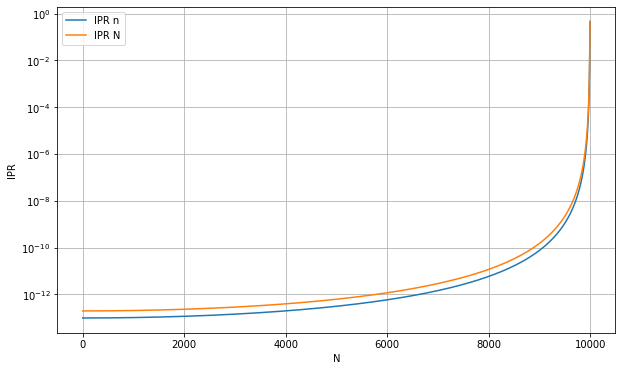

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lamb = 1.0
hb = 1.0     #hbar
j0 = 0.3

N = 10000
n = np.arange(2,N-1)

fterm = hb**8 * j0 **4 * lamb **4 * (-n**2 -n + N**2 + N)**2 * (-n**2 - 3*n + N**2 + N -2)**2/(16*N**4)
sterm = hb**8 * j0 **4 * lamb **4 * (-n**2 +n + N**2 + N)**2 * (-n**2 + 3*n + N**2 + N -2)**2/(16*N**4)
thrdterm = 1

ipr = 1/(fterm + sterm + thrdterm)



#fterm = 0
#secondterm =  j0 **4 * lamb **4 *16 *n**2 * (2*n-1)**2/(16*n**4)
#thrdterm = 1

fterm = 0
secondterm =  4 * n**2/ (j0 **4 * lamb **4 + 4 * n**2)
thrdterm = 1

plt.figure(figsize=(10,6))

plt.plot(n, ipr,label='IPR n')
plt.plot(n, 1/(fterm + sterm + thrdterm), label = 'IPR N')

plt.xlabel("N")
plt.ylabel("IPR")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

The conditions for different IPR segments and respective cumulative values-

\begin{align*}
IPR_{1} &= -\frac{{\lambda \hslash}^2 J_0\big(\eta\big) \sqrt{-n^2-n+N^2+N}\sqrt{-n^2-3n+N^2+N-2}}{2N}+ \vert N,n\rangle & {when \hskip 1cm}  N-2\leq n \leq N \\
IPR_{2} &= \frac{{\lambda \hslash}^2 J_0\big(\eta\big) \sqrt{-n^2+n+N^2+N}\sqrt{-n^2+3n+N^2+N-2}}{2N} + \vert N,n\rangle & {when \hskip 1cm}  0\leq n \leq N -2\\
\end{align*}

/tmp/ipykernel_2853/495852575.py:11: RuntimeWarning: invalid value encountered in sqrt
  case1 = (-hb**2 * j0 * lamb * np.sqrt(-n**2 -n + N**2 + N) *  np.sqrt(-n**2 - 3*n + N**2 + N -2) + 1)**4


ValueError: x and y must have same first dimension, but have shapes (3,) and (9997,)

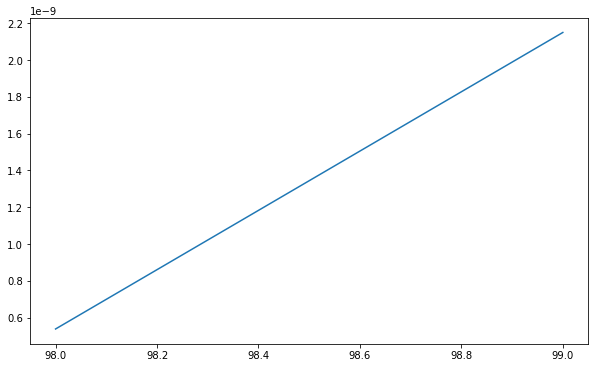

In [4]:
import numpy as np
import matplotlib.pyplot as plt

lamb = 1.0
hb = 1.0     #hbar
j0 = 0.3

N = 100
n = np.arange(N-2,N+1)

case1 = (-hb**2 * j0 * lamb * np.sqrt(-n**2 -n + N**2 + N) *  np.sqrt(-n**2 - 3*n + N**2 + N -2) + 1)**4
case2 = (hb**2 * j0 * lamb * np.sqrt(-n**2 +n + N**2 + N) * np.sqrt(-n**2 + 3*n + N**2 + N -2) +1)**4

ipr = 1/(case1 + case2)



#fterm = 0
#secondterm =  j0 **4 * lamb **4 *16 *n**2 * (2*n-1)**2/(16*n**4)
#thrdterm = 1

fterm = 0
secondterm =  4 * n**2/ (j0 **4 * lamb **4 + 4 * n**2)
thrdterm = 1

plt.figure(figsize=(10,6))

plt.plot(n, ipr,label='IPR n')
plt.plot(n, 1/(fterm + sterm + thrdterm), label = 'IPR N')

plt.xlabel("N")
plt.ylabel("IPR")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

RWA Hamiltonian for higer order :
================

\begin{align*}
H^{RWA} &= H_0 + V\\
H_0 &\approx \frac{2}{N} \left(S^x\right)^2 -\frac{2 J_0}{N}\big(\left(S^x\right)^2 +2 \left(S^z\right)^2\big)\\
\end{align*}

\begin{align*}
V &= -\frac{4}{N}\bigg\{2\left(S^z\right)^2 + \left(S^x\right)^2\bigg\}\sum_{n=1}^\infty J_{2n}(\eta)\cos(2n\omega t) -\frac{4}{N}\bigg\{i\left(S^x\right) + 2 \left(S^z\right)\left(S^y\right)\bigg\}\sum_{n=1}^\infty J_{2n-1}(\eta)\sin((2n-1)\omega t)
\end{align*}
where $\eta = \frac{4h}{\omega}$, and the quantization direction is $x$, *not* z. If eigenstates of $S^x$ are $\vert s \rangle$, where $s\in\left[-N/2, N/2\right]$, \\

When $n=1$
\begin{align*}
V_1 &= -\frac{4}{N}\bigg\{i S^x + 2 S^z S^y \bigg\} J_{1}(\eta)\sin(\omega t)
\end{align*}
When $n=2$
\begin{align*}
V_2 &= -\frac{4}{N}\bigg\{2\left(S^z\right)^2 + \left(S^x\right)^2\bigg\}J_{4}(\eta)\cos(4\omega t)
\end{align*}








The perturbed eigenstates of $H^{RWA}$ are 

when $n=1$
\begin{align*}
|\phi_s^1\rangle &= \vert s \rangle -\frac{4J_1(\eta) \sin(\omega t)}{N}\sum_{s^\prime\neq s}\frac{V_{ss^\prime}^1}{s-s^\prime}\vert s^\prime\rangle\\
V_{ss^\prime}^1 &= \bigg\{i\left\langle s\left\vert S^x \right\vert s^\prime\right\rangle + 2\left\langle s\left\vert S^zS^y\right\vert s^\prime\right\rangle\bigg\}
\end{align*}

when $n=2$
\begin{align*}
|\phi_s^2\rangle &= \vert s \rangle -\frac{4J_4(\eta) \cos(4\omega t)}{N}\sum_{s^\prime\neq s}\frac{V_{ss^\prime}^2}{s-s^\prime}\vert s^\prime\rangle\\
V_{ss^\prime}^2 &= \bigg\{2\langle s\left\vert\left(S^z\right)^2\right\vert s^\prime\rangle + \langle s\left\vert\left(S^x\right)^2\right\vert s^\prime\rangle\bigg\}
\end{align*}




We change the index from $s$ to $n = s + N/2$, which is an integer in the range $[0,N]$. Then
\begin{align*}
|\phi_n^1\rangle &= \vert n \rangle -\frac{4J_1(\eta) \sin(\omega t)}{N}\sum_{m\neq n}\frac{V_{nm}^1}{n-m}\vert m\rangle\\
V_{nm^\prime}^1 &= \bigg\{i\left\langle n\left\vert S^x \right\vert m\right\rangle + 2\left\langle n\left\vert S^zS^y\right\vert m\right\rangle\bigg\}
\end{align*}
and
\begin{align*}
|\phi_n^2\rangle &= \vert n \rangle -\frac{4J_4(\eta) \cos(4\omega t)}{N}\sum_{m\neq n}\frac{V_{nm^\prime}^2}{n-m^\prime}\vert s^\prime\rangle\\
V_{nm^\prime}^2 &= \bigg\{2\langle n\left\vert\left(S^z\right)^2\right\vert m\rangle + \langle n\left\vert\left(S^x\right)^2\right\vert m\rangle\bigg\}
\end{align*}

In [2]:
import sympy
from sympy.physics.quantum.spin import JzKet as n_ket
from sympy.physics.quantum.spin import JzBra as n_bra


from sympy.physics.quantum.spin import Jz as Sx
from sympy.physics.quantum.spin import Jx as Sy
from sympy.physics.quantum.spin import Jy as Sz


from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.innerproduct import InnerProduct as ip

from sympy.physics.quantum.spin import J2 as S2

N = sympy.Symbol('N', integer=True)
n = sympy.Symbol('n', integer=True)
m = sympy.Symbol('m', integer=True)



qapply((1/(n-m)) * (n_bra(N,n)*Sx*n_ket(N,m) + 2* n_bra(N,n)*Sz*Sy*n_ket(N,m))) * n_ket(N,m)

(hbar*m*KroneckerDelta(m, n)/(-m + n) - hbar**2*I*m*KroneckerDelta(m, n)/(-m + n) - hbar**2*I*sqrt(N**2 + N - m**2 - m)*sqrt(N**2 + N - m**2 - 3*m - 2)*KroneckerDelta(n, m + 2)/(-2*m + 2*n) + hbar**2*I*sqrt(N**2 + N - m**2 + m)*sqrt(N**2 + N - m**2 + 3*m - 2)*KroneckerDelta(n, m - 2)/(-2*m + 2*n))*|N,m>

In [1]:
import sympy

from sympy import KroneckerDelta as kdel

from sympy import zoo

from sympy.physics.quantum.spin import JzKet as n_ket
from sympy.physics.quantum.spin import JzBra as n_bra
from sympy.physics.quantum.dagger import Dagger

from sympy.physics.quantum.spin import Jz as Sx
from sympy.physics.quantum.spin import Jx as Sy
from sympy.physics.quantum.spin import Jy as Sz


from sympy.physics.quantum.qapply import qapply
from sympy.physics.quantum.innerproduct import InnerProduct as ip

from sympy.physics.quantum.spin import J2 as S2

N = sympy.Symbol('N', integer=True, positive=True)
n = sympy.Dummy('n', integer=True, nonnegative=True)
m = sympy.Dummy('m', integer=True, nonnegative=True)

p = sympy.Dummy('p', integer=True, nonnegative=True)

lamb = sympy.Symbol('\lambda', real=True)


def psiprod(m,n):
    return qapply(lamb * qapply((1/(n-m)) * (n_bra(N,n)\
                                                  * Sx * n_ket(N,m) + n_bra(N,n) *\
                                                            Sz * Sy * n_ket(N,m))) * n_ket(N,m))

phi_n = n_ket(N,n) -  sympy.Sum(psiprod(m,n),(m,0,N)).doit() 


sympy.simplify(phi_n).subs(zoo,0)
#inner_prod = phi_n.subs(n_ket(N,n),kdel(p,n))
#inner_prod = inner_prod.subs(n_ket(N,n-2),kdel(p,n-2))
#inner_prod = inner_prod.subs(n_ket(N,n+2),kdel(p,n+2))
#inner_prod = inner_prod.subs(n<=N, True)

#inner_prod
#p_psi_n = qapply(n_bra(N,p) * psi_n)
#psi_n_p = qapply(Dagger(psi_n) * n_ket(N,p))

#ipr= 1/(qapply(p_psi_n * psi_n_p))**2
#ipr

Piecewise((\lambda*(hbar**2*I*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2> + hbar**2*I*sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2>)/8 + |N,_n>, (_n >= 2) & (_n <= N) & (_n - N <= -2)), (hbar**2*I*\lambda*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2>/8 + |N,_n>, (_n <= N) & (_n - N <= -2)), (hbar**2*I*\lambda*sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2>/8 + |N,_n>, (_n >= 2) & (_n <= N) & (_n - N <= 2)), (|N,_n>, _n <= N), (hbar**2*I*\lambda*(sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2> + sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2>)/8 + |N,_n>, (_n >= 2) & (_n - N <= -2)), (hbar**2*I*\lambda*sqrt(-_n**2 - _n + N**2 + N)*sqrt(-_n**2 - 3*_n + N**2 + N - 2)*|N,_n + 2>/8 + |N,_n>, _n - N <= -2), (hbar**2*I*\lambda*sqrt(-_n**2 + _n + N**2 + N)*sqrt(-_n**2 + 3*_n + N**2 + N - 2)*|N,_n - 2>/8 + |N,_n>, (_n >= 2) & (